# Mathematik für Biologiestudierende II

Sommersemester 2025

22.04.2025

&copy; 2025 Prof. Dr. Rüdiger W. Braun 

In [1]:
import numpy as np
np.set_printoptions(legacy='1.21')
import pandas as pd
from scipy import stats
import seaborn as sns
sns.set_theme()

# Post-hoc Analyse

* Wenn die ANOVA einen signifikanten Unterschied zwischen den Gruppen gezeigt hat, dann versucht man mit der post-hoc Analyse herauszubekommen, zwischen welchen einzelnen Gruppen signifikante Unterschiede bestehen
* Die post-hoc Analyse muss für multiple Vergleiche korrigiert werden

### Beispiel Zitronen

In [2]:
df = pd.read_csv("http://reh.math.uni-duesseldorf.de/~braun/bio2425/zitronen.csv")

In [3]:
df.head()

,Vitamin_C_Gehalt,Land
0,494.5,Spanien
1,499.2,Spanien
2,494.3,Spanien
3,478.0,Spanien
4,500.1,Spanien


Die Tabelle (mit erfundenen Daten) zeigt den Vitamin C Gehalt in [mg] pro [kg] von Zitronen aus verschiedenen Ländern

In [4]:
df.Land.value_counts()

Land
Spanien         8
Italien         8
Griechenland    8
Marokko         8
Indien          8
Name: count, dtype: int64

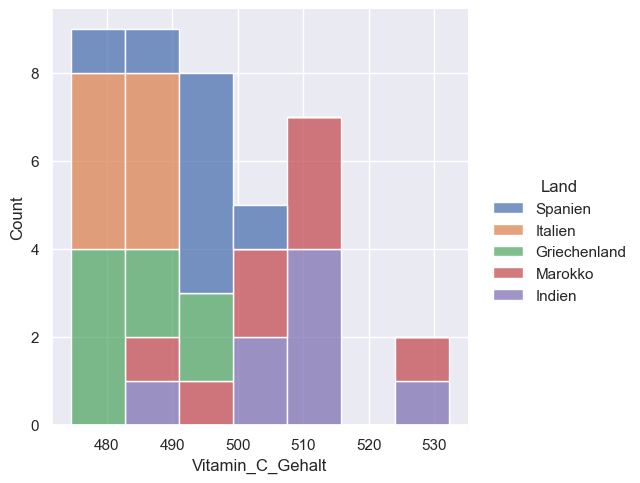

In [5]:
sns.displot(df, x='Vitamin_C_Gehalt', hue='Land', multiple='stack');

In [6]:
spanien = df[df.Land=='Spanien'].Vitamin_C_Gehalt
italien = df[df.Land=='Italien'].Vitamin_C_Gehalt
griechenland = df[df.Land=='Griechenland'].Vitamin_C_Gehalt
marokko = df[df.Land=='Marokko'].Vitamin_C_Gehalt
indien = df[df.Land=='Indien'].Vitamin_C_Gehalt

In [7]:
stats.f_oneway(spanien, italien, griechenland, marokko, indien)

F_onewayResult(statistic=11.873757820342005, pvalue=3.373341669675729e-06)

Die Unterschiede zwischen den Vitamin C Gehalten sind signifikant

## Paarvergleiche

* Wir könnten zwischen je zwei Gruppen die Paarvergleiche zu Fuß ausrechnen und Bonferroni-korrigieren
* Dieser Prozess ist aber implementiert

In [8]:
from statsmodels.sandbox.stats.multicomp import MultiComparison

Achtung:  Hier wird irgendwann der Bestandteil `sandbox` überflüssig

In [9]:
muc = MultiComparison(df.Vitamin_C_Gehalt, df.Land)

`muc = MultiComparison(daten_liste, gruppen_liste)`

* das erste Element von `daten_liste` gehört zur ersten Gruppe in Gruppenliste
* das zweite Element von `daten_liste` gehört zur zweiten Gruppe in Gruppenliste
* usw.

`muc.allpairtest(test, alpha, method)`

* Paarvergleiche zwischen allen Paaren von Gruppen aus der Gruppenliste, mit der `muc` angelegt wurde
* `test` ist der einzusetzende Test
* `alpha` das Signifikanzniveau (Standardwert ist 0.05)
* `method` die Korrekturmethode für das multiple Testen, für uns relevant:
  * `bonferroni`: Bonferroni
  * `holm`: Bonferroni-Holm

In [10]:
res = muc.allpairtest(stats.ttest_ind, method='bonferroni')
res[0]

group1,group2,stat,pval,pval_corr,reject
Griechenland,Indien,-4.9524,0.0002,0.0021,True
Griechenland,Italien,1.113,0.2845,1.0,False
Griechenland,Marokko,-3.5339,0.0033,0.0331,True
Griechenland,Spanien,-1.9478,0.0718,0.7178,False
Indien,Italien,6.2008,0.0,0.0002,True
Indien,Marokko,0.3183,0.7549,1.0,False
Indien,Spanien,3.3226,0.005,0.0503,False
Italien,Marokko,-4.3312,0.0007,0.0069,True
Italien,Spanien,-3.3042,0.0052,0.0522,False
Marokko,Spanien,2.2786,0.0389,0.389,False


Nur vier der Paarvergleiche sind signifikant, wenn Bonferroni korrigiert wird

Dasselbe mit Bonferroni-Holm

In [11]:
res = muc.allpairtest(stats.ttest_ind, method='holm')
res[0]

group1,group2,stat,pval,pval_corr,reject
Griechenland,Indien,-4.9524,0.0002,0.0019,True
Griechenland,Italien,1.113,0.2845,0.5689,False
Griechenland,Marokko,-3.5339,0.0033,0.0231,True
Griechenland,Spanien,-1.9478,0.0718,0.2153,False
Indien,Italien,6.2008,0.0,0.0002,True
Indien,Marokko,0.3183,0.7549,0.7549,False
Indien,Spanien,3.3226,0.005,0.0302,True
Italien,Marokko,-4.3312,0.0007,0.0055,True
Italien,Spanien,-3.3042,0.0052,0.0302,True
Marokko,Spanien,2.2786,0.0389,0.1556,False


* Wenn Bonferroni-Holm korrigiert wird, dann sind sechs der Paarvergleiche signifikant

* Es hängt von der Fächerkultur ab, ob Bonferroni-Holm akzeptiert wird

## Bonferroni-Holm

* n multiple Vergleiche werden durchgeführt
* Die p-Werte werden der Größe nach geordnet
* der kleinste p-Wert muss signifikant zu $\frac\alpha n$ sein
* der zweitkleinste zu $\frac\alpha{n-1}$
* drittkleinste zu $\frac\alpha{n-2}$
* usw.
* der größte zum Niveau $\alpha$

Bei den Zitronen

* der kleinste *p*-Wert ist der des Vergleichs zwischen Indien und Italien
* er ist unkorrigiert gleich 2.311e-5 
* es gibt 10 Paarvergleiche, also ist der Bonferroni-korrigierte Wert gleich 0.0002311
* die Bonferroni-Holm Korrektur führt zum selben Wert


* der zweitkleinste *p*-Wert ist der des Vergleichs zwischen Griechenland und Indien
* er ist unkorrigiert gleich 2.125e-4
* also mit Bonferroni-Korrektur gleich 0.002125
* nach Bonferroni-Holm ist der gleich 2.125e-4/9 = 1.913

## Ablesung genauerer Werte

* Woher weiss ich die genauen *p*-Werte?
* `res = muc.allpairtest(stats.ttest_ind, method='bonferroni')` ist ein Paar mit zwei Einträgen
* `res[0]` ist die leserfreundlich formatierte Tabelle
* die genauen Werte stehen in `res[1]`

In [12]:
res[1] 

(array([[-4.95235073e+00,  2.12516086e-04],
        [ 1.11298427e+00,  2.84460819e-01],
        [-3.53387275e+00,  3.30511610e-03],
        [-1.94781061e+00,  7.17760991e-02],
        [ 6.20082296e+00,  2.31091193e-05],
        [ 3.18345880e-01,  7.54921930e-01],
        [ 3.32261512e+00,  5.03074269e-03],
        [-4.33123161e+00,  6.90566981e-04],
        [-3.30423221e+00,  5.21815835e-03],
        [ 2.27858634e+00,  3.88961763e-02]]),
 array([ True, False,  True, False,  True, False,  True,  True,  True,
        False]),
 array([1.91264477e-03, 5.68921637e-01, 2.31358127e-02, 2.15328297e-01,
        2.31091193e-04, 7.54921930e-01, 3.01844561e-02, 5.52453585e-03,
        3.01844561e-02, 1.55584705e-01]),
 0.005116196891823743,
 0.005)

* Der erste Array ist zweidimensional und enthält die genauen Werte der Statistik und die unkorrigierten *p*-Werte

* wichtig ist der dritte Array, der die korrigierten *p*-Werte in der Reihenfolge enthält in der die Paarvergleiche in der Tabelle aufgeführt sind

In [13]:
p_werte_korrigiert = res[1][2]
p_werte_korrigiert

array([1.91264477e-03, 5.68921637e-01, 2.31358127e-02, 2.15328297e-01,
       2.31091193e-04, 7.54921930e-01, 3.01844561e-02, 5.52453585e-03,
       3.01844561e-02, 1.55584705e-01])

In [14]:
stats.f_oneway(spanien, italien, griechenland, marokko, indien).pvalue

3.373341669675729e-06

Der *p*-Wert der ANOVA ist kleiner als 5.0E-6.  Daher ist zu diesem Signifikanzniveau nachgewiesen, dass Zitronen aus verschiedenen Ländern unterschiedliche Vitamin C Gehalte haben.  Wir rechnen die post-hoc Analyse für dieses Signifikanzniveau

In [15]:
res = muc.allpairtest(stats.ttest_ind, alpha=5.0E-6, method='bonferroni')

In [16]:
res[0]

group1,group2,stat,pval,pval_corr,reject
Griechenland,Indien,-4.9524,0.0002,0.0021,False
Griechenland,Italien,1.113,0.2845,1.0,False
Griechenland,Marokko,-3.5339,0.0033,0.0331,False
Griechenland,Spanien,-1.9478,0.0718,0.7178,False
Indien,Italien,6.2008,0.0,0.0002,False
Indien,Marokko,0.3183,0.7549,1.0,False
Indien,Spanien,3.3226,0.005,0.0503,False
Italien,Marokko,-4.3312,0.0007,0.0069,False
Italien,Spanien,-3.3042,0.0052,0.0522,False
Marokko,Spanien,2.2786,0.0389,0.389,False


Keiner der Paarvergleiche ist signifikant.

# Behandlung von NaN

In [17]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [18]:
df.island.value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [19]:
g1 = df[df.island=='Biscoe'].body_mass_g.dropna()
g2 = df[df.island=='Dream'].body_mass_g.dropna()
g3 = df[df.island=='Torgersen'].body_mass_g.dropna()

In [20]:
stats.f_oneway(g1, g2, g3)

F_onewayResult(statistic=110.00796506232122, pvalue=1.5151291424015603e-37)

* `allpairtest` benötigt alle Daten in derselben Tabelle

* Wir müssen also in der Ausgangstabelle alle Zeilen löschen, in denen das Gewicht fehlt

In [21]:
df_dropped = df[df.body_mass_g.notnull()]
df_dropped

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


* man möchte testen `df.body_mass_g==np.nan`
* das geht aber nicht, weil `nan` besondere Rechenregeln hat
* stattdessen prüft die Methode `notnull()` darauf, ob ein Element ungleich `NaN` ist
* das Gegenteil von `notnull` ist `isnull`

Im Gegensatz dazu entfernt die folgende Operation alle Zeilen, in denen mindestens ein Wert fehlt

In [22]:
df2 = df.dropna()
df2

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


* Das sind 9 Zeilen weniger
* Es gibt also 9 Pinguine, von denen das Gewicht bestimmt werden konnte, mindestens ein anderer Wert aber nicht

Die unbestimmte Größe ist übrigens das Geschlecht:

In [23]:
df_dropped[df_dropped.sex.isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [24]:
muc = MultiComparison(df_dropped.body_mass_g, df_dropped.island)

In [25]:
res = muc.allpairtest(stats.ttest_ind, method='bonferroni')

In [26]:
res[0]

group1,group2,stat,pval,pval_corr,reject
Biscoe,Dream,12.9663,0.0,0.0,True
Biscoe,Torgersen,8.7781,0.0,0.0,True
Dream,Torgersen,0.0924,0.9265,1.0,False


* Wir haben einen *Störfaktor* (engl. *confounding variable*)
* Das ist eine unbeachtete Größe, die die Zielvariable beeinflusst 

* Das Gewicht hängt von der Art ab
* Nicht auf allen Inseln sind alle Arten im selben Umfang vertreten

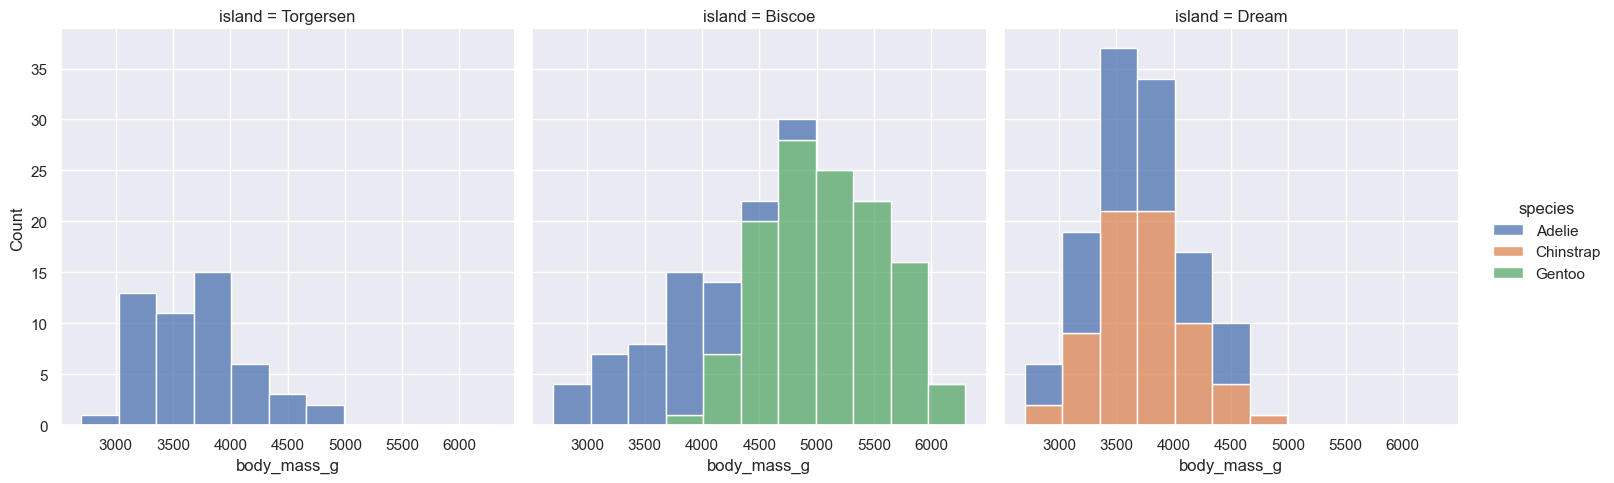

In [27]:
sns.displot(df, x="body_mass_g", col="island", hue="species", multiple='stack');

In [28]:
muc = MultiComparison(df_dropped.body_mass_g, df_dropped.species)
res = muc.allpairtest(stats.ttest_ind, method='bonferroni')
res[0]

group1,group2,stat,pval,pval_corr,reject
Adelie,Chinstrap,-0.5081,0.6119,1.0,False
Adelie,Gentoo,-23.6136,0.0,0.0,True
Chinstrap,Gentoo,-19.1032,0.0,0.0,True


* Adelie- und Zügelpinguine wiegen gleich viel
* Eselspinguine unterscheiden sich im Gewicht
* Eselspinguine gibt es nur auf Biscoe